In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn



### Load dataset

In [18]:
asd_2018_df = pd.read_csv('dataset_2018.csv')

In [19]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'}, inplace=True)

In [20]:
female_df = asd_2018_df[asd_2018_df['Sex']=='f']

In [21]:
female_df = female_df.drop(['Case_No', 'Qchat-10-Score','Who completed the test','Ethnicity'], axis=1)

In [22]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   319 non-null    int64 
 1   A2                   319 non-null    int64 
 2   A3                   319 non-null    int64 
 3   A4                   319 non-null    int64 
 4   A5                   319 non-null    int64 
 5   A6                   319 non-null    int64 
 6   A7                   319 non-null    int64 
 7   A8                   319 non-null    int64 
 8   A9                   319 non-null    int64 
 9   A10                  319 non-null    int64 
 10  Age_Mons             319 non-null    int64 
 11  Sex                  319 non-null    object
 12  Jaundice             319 non-null    object
 13  Family_mem_with_ASD  319 non-null    object
 14  ASD_Traits           319 non-null    object
dtypes: int64(11), object(4)
memory usage: 39.9+ KB


### Preprocess

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OneHotEncoder()
scaler = MinMaxScaler()

age = ['Age_Mons']
char_vals = ['ASD_Traits','Sex','Jaundice','Family_mem_with_ASD']
target = ['ASD_Traits']

In [24]:
def preprocess(age, char_vals,dataframe):
  dataframe[age] = scaler.fit_transform(dataframe[age].values.reshape(-1,1)) 

  for c in char_vals:
      dataframe[c] = encoder.fit_transform(dataframe[c].values.reshape(-1,1)).toarray()
  print(dataframe.dtypes)
  print(dataframe.head())

In [25]:
preprocess(age, char_vals, female_df)

A1                       int64
A2                       int64
A3                       int64
A4                       int64
A5                       int64
A6                       int64
A7                       int64
A8                       int64
A9                       int64
A10                      int64
Age_Mons               float64
Sex                    float64
Jaundice               float64
Family_mem_with_ASD    float64
ASD_Traits             float64
dtype: object
    A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Jaundice  \
0    0   0   0   0   0   0   1   1   0    1  0.666667  1.0       0.0   
4    1   1   0   1   1   1   1   1   1    1  0.333333  1.0       1.0   
12   0   0   0   0   0   0   0   0   0    0  0.541667  1.0       0.0   
13   1   1   1   1   0   0   1   0   1    1  0.125000  1.0       0.0   
17   1   1   1   0   1   1   1   1   0    1  0.000000  1.0       0.0   

    Family_mem_with_ASD  ASD_Traits  
0                   1.0         1.0  
4           

### Split into train and test set and fit a model

In [26]:
from sklearn.model_selection import train_test_split

X = female_df.drop("ASD_Traits", axis=1)
y = female_df["ASD_Traits"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [31]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_on_test(model, predictors, target):
  predictions = model.predict(predictors)
  print("Accuracy: ", accuracy_score(target, predictions))
  print("Precision: ", precision_score(target, predictions))
  print("Recall: ", recall_score(target, predictions))
  print("F1: ", f1_score(target, predictions))
  ConfusionMatrixDisplay.from_estimator(model, predictors, target)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


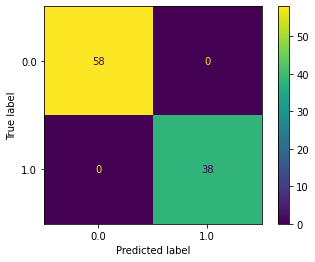

In [32]:
# from sklearn.metrics import accuracy_score

# y_pred = ada.predict(X_test)
# print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
evaluate_on_test(ada, X_test, y_test)

In [30]:
# import pickle 
# pickle.dump(ada,open('ada_female.pkl','wb'))